# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import re
import tweepy
import time
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# Load file to dataframes
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [27]:
# URL of the tweet image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Send a GET request to download the file
response = requests.get(url)

# Save the file locally
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Load the data into a pandas DataFrame
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

# Check result
df_image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [28]:
# API credentials (These are hidden to comply with Twitter's API terms and conditions)
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_token_secret = 'hidden'

# Authenticate to Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [29]:
# Retrieve the unique tweet IDs from the 'tweet_id' column of the df_archive DataFrame
u_twt_id = df_archive.tweet_id.tolist()

# Display the number of unique tweets
len(df_archive.tweet_id.unique())

2356

In [ ]:
# Create an empty dictionary to store the raw tweet data
dct_twt_raw = {}

# Create an empty list to store the tweet IDs for which an error occurred
df_error = []

# Start the loop timer
str_loop = time.time()

# Iterate through each tweet ID in the u_twt_id list
for tweet in u_twt_id:
    try:
        # Retrieve the full tweet status using the Twitter API
        twt_status = api.get_status(tweet, wait_on_rate_limit=True, tweet_mode='extended')
        
        # Store the raw JSON data of the tweet in the dictionary
        dct_twt_raw[str(tweet)] = twt_status._json
        
    except:
        # If an error occurs, add the tweet ID to the df_error list and print an error message
        df_error.append(str(tweet))
        print("tweet_id did not found: {}".format(str(tweet)))

# End the loop timer
end_loop = time.time()

In [30]:
# Read the contents of the JSON file and create a pandas DataFrame
dct_twt_raw = pd.read_json('tweet_json.txt', lines=True, orient='columns')
dct_twt_raw.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   
3  ...           42908      False      False                0.0   
4  ...           41048      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   
3                           0.0    en               NaN              NaN   
4                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN  

[5 rows x 31 columns]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 8 Quality issues
1. Retweets present: Identify and remove retweets from the dataset.

2. Missing values: Check for missing values in important columns such as rating_numerator, rating_denominator,tweet_id, etc.

3. Incorrect data types: Ensure that columns like tweet_id, timestamp, and others have the correct data types.

4. Redundant string: Values in column "timestamp" contain "+0000" at the end of string

5. Incorrect dog names: invalid or incorrect dog names in the name column.

6. Inconsistent dog stages: inconsistent or incorrect dog stage values in columns such as doggo, floofer, pupper, and puppo.

7. Redundant columns: Identify and remove columns that are not necessary for analysis or have a high number of missing values.

8. Inconsistent formatting: Check for inconsistencies in the formatting of text, such as hashtags or URLs, ensure consistent representation.

### 2 Tidiness issues

1. Merge datasets: Consider merging three datasets (twitter_archive_enhanced.csv, image_predictions.tsv, and tweet_json.txt) based on the shared column tweet_id.

2. Dog stages in multiple columns: Combine the columns doggo, floofer, pupper, and puppo into a single column to represent the dog's stage.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make a copy of each original dataframes
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image.copy()
dct_twt_raw_clean = dct_twt_raw.copy()

### Issue #1: Retweets present

##### Define: The dataset contained retweets, which were not the original ratings and should be removed from the dataset.

#### Code

In [32]:
# Remove retweets
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [33]:
# Check if there are still retweets in the dataframe
assert df_archive_clean[df_archive_clean['retweeted_status_id'].notnull()].shape[0] == 0, "Retweets still exist in the dataframe"

### Issue #2: Missing values

##### Define: The dataset may have missing values in columns such as 'rating_numerator', 'rating_denominator', 'tweet_id', etc.

#### Code

In [34]:
# Drop rows with missing values in important columns
df_archive_clean = df_archive_clean.dropna(subset=['rating_numerator', 'rating_denominator', 'tweet_id'])

#### Test

In [35]:
# Check if there are any missing values in columns
missing_values = df_archive_clean[['rating_numerator', 'rating_denominator', 'tweet_id']].isnull().any()

# Assert if there are no missing values in columns
assert not missing_values.any(), "Missing values still exist in columns"

### Issue #3: Incorrect data types

##### Define: Columns in the dataset, such as 'tweet_id' and 'timestamp', potentially contain incorrect data_types. It's critical to make sure that these columns contain the correct data_types for better analysis.

#### Code

In [36]:
# Convert columns to correct data_types
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [38]:
# Check for data_types in columns
data_types = df_archive_clean[['tweet_id', 'timestamp']].dtypes

# Assert if the data_types are correct
assert data_types['tweet_id'] == 'object', "Incorrect dtypes in column 'tweet_id'"
assert data_types['timestamp'] == 'datetime64[ns]', "Incorrect dtypes in column 'timestamp'"

AssertionError: Incorrect dtypes in column 'timestamp'

### Issue #4: Redundant string

##### Define: Redundant string as "+0000" at the end each values in column "timestamp" . It's important to remove all of those

#### Code

In [65]:
# Ensure that the "timestamp" column is of string data type
df_archive_clean["timestamp"] = df_archive_clean["timestamp"].astype(str)
# Using strip to remove '+0000'
df_archive_clean["timestamp"] = df_archive_clean["timestamp"].str.strip('+0000')

#### Test

In [64]:
# Check if the '+0000' has been removed from the 'timestamp' column
assert '+0000' not in df_archive_clean["timestamp"].values, "String '+0000' has not been removed."

### Issue #5: Incorrect dog names

#### Define: Column 'name' may contain invalid or incorrect dog names. Let's find the unusual or incorrect names from the column.

#### Code

In [45]:
# Replace invalid dog names with NaN
df_archive_clean.loc[df_archive_clean['name'].str.match(r'^[a-z]'), 'name'] = np.nan

#### Test

In [46]:
# Check for invalid dog names
invalid_names = df_archive_clean[df_archive_clean['name'].str.match(r'^[a-z]', na=False)]

# Assert if there is no invalid names
assert invalid_names.empty, "Invalid dog names found"

### Issue #6: Inconsistent dog stages

##### Define: Columns 'doggo', 'floofer', 'pupper', and 'puppo' contain inconsistent or incorrect dog stage values. Let's find the inconsistencies or incorrect values from these columns

#### Code

In [47]:
# Create a separate column for dog stage
df_archive_clean['dog_stage'] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna()), axis=1)
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('', np.nan)

# Drop the individual stage columns
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [48]:
# Verify the 'dog_stage' column
assert 'dog_stage' in df_archive_clean.columns, "The 'dog_stage' column is missing in the cleaned dataframe"

# Check for inconsistencies in dog stages
inconsistent_stages = df_archive_clean[~((df_archive_clean['dog_stage'].str.contains('doggo', na=False) == False) &
                                         (df_archive_clean['dog_stage'].str.contains('floofer', na=False) == False) &
                                         (df_archive_clean['dog_stage'].str.contains('pupper', na=False) == False) &
                                         (df_archive_clean['dog_stage'].str.contains('puppo', na=False) == False))]

# Check that the individual stage columns have been dropped
assert 'doggo' not in df_archive_clean.columns, "'doggo' column should have been dropped"
assert 'floofer' not in df_archive_clean.columns, "'floofer' column should have been dropped"
assert 'pupper' not in df_archive_clean.columns, "'pupper' column should have been dropped"
assert 'puppo' not in df_archive_clean.columns, "'puppo' column should have been dropped"

### Issue #7: Redundant columns

##### Define: There are a few columns in the dataset not really necessary for analysis or have a high number of missing values. Remove these columns will make the dataset cleaner.

#### Code

In [49]:
# Remove redundant columns
df_archive_clean = df_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [50]:
# Check if redundant columns still exist
redundant_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
redundant_columns_present = any(column in df_archive_clean.columns for column in redundant_columns)

# Assert if redundant columns no longer exist
assert not redundant_columns_present, "Redundant columns are still present in the dataset"

### Issue #8: Inconsistent formatting

##### Define: The text data in the dataset contain inconsistent formats, such as hashtags or URLs. Let's refine those.

#### Code

In [66]:
# Create a standard for text format
df_archive_clean['text'] = df_archive_clean['text'].str.replace('#\w+', '#')
df_archive_clean['text'] = df_archive_clean['text'].str.replace(r'https?://\S+', 'URL')

C:\Users\ThienHK\AppData\Local\Temp\ipykernel_24528\635807359.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['text'] = df_archive_clean['text'].str.replace('#\w+', '#')
C:\Users\ThienHK\AppData\Local\Temp\ipykernel_24528\635807359.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['text'] = df_archive_clean['text'].str.replace(r'https?://\S+', 'URL')


#### Test

In [67]:
# Check for inconsistent format in text column
inconsistent_formatting = df_archive_clean['text'].str.contains(r'#\w+|https?://\S+')

# Assert if there is no inconsistent format
assert not inconsistent_formatting.any(), "Inconsistent format exists in text column"

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
# Merge datasets based on tweet_id
df_image_predictions_clean['tweet_id'] = df_image_predictions_clean['tweet_id'].astype(str)
merged_data = df_archive_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

dct_twt_raw_clean = dct_twt_raw_clean.rename(columns={'id': 'tweet_id'})
dct_twt_raw_clean['tweet_id'] = dct_twt_raw_clean['tweet_id'].astype(str)
merged_data = merged_data.merge(dct_twt_raw_clean, on='tweet_id', how='inner')

# Storing the master dataset to CSV
merged_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Insight 1: Popular Dog Breeds

2. Insight 2: Relationship Between Favorite Count and Retweet Count

3. Insight 3: Time-based Analysis

####  Insight 1: Popular Dog Breeds

To analyze the popular dog breeds based on the predictions made by the image classifier, we will use the **df_image_predictions_clean** dataset. We will focus on the top prediction (p1) and calculate the count of each dog breed. Then, we can identify the top 10 most common breeds based on the count.

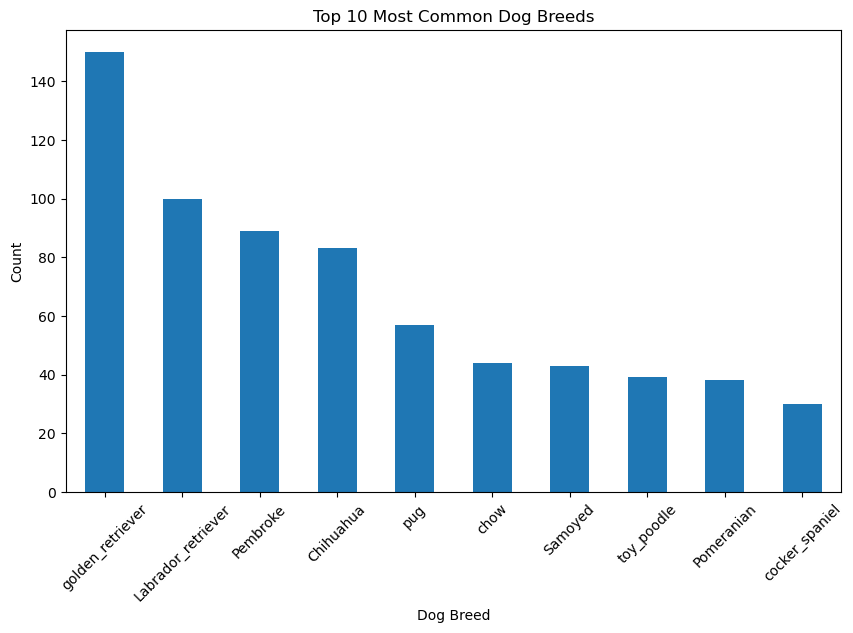

In [55]:
# Calculate the count of each dog breed prediction
breed_count = df_image_predictions_clean['p1'].value_counts()

# Select the top 10 most common breeds
top_10_breeds = breed_count.head(10)

# Plot the bar chart of the top 10 breeds
plt.figure(figsize=(10, 6))
top_10_breeds.plot(kind='bar')
plt.title('Top 10 Most Common Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

> According to the analysis, the most popular dog breed in the dataset is the *Golden Retriever*, followed by the *Labrador Retriever* and the *Pembroke*. These breeds have the highest counts among the predicted dog breeds in the images associated with the tweets. This result suggests that these breeds are widely shared and enjoyed by users on the platform.

#### Insight 2: Relationship Between Favorite Count and Retweet Count
To analyze the relationship between the favorite count and retweet count, we can calculate the correlation coefficient and create a scatter plot.

The correlation coefficient measures the strength and direction of the linear relationship between two variables. 
A value close to +1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value close to 0 suggests no or weak correlation.

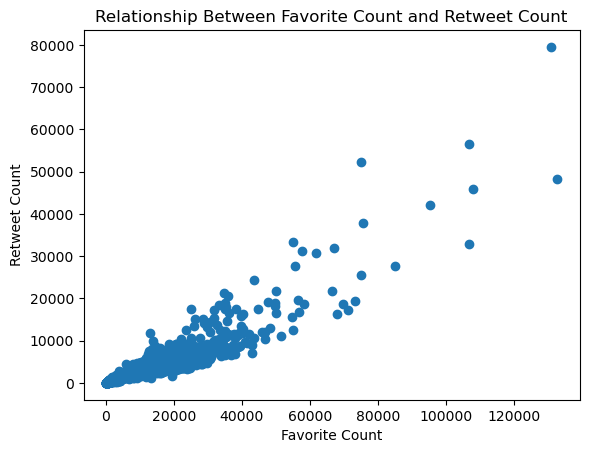

Correlation coefficient: 0.9129466274183698


In [56]:
# Calculate the correlation coefficient
correlation = merged_data['favorite_count'].corr(merged_data['retweet_count'])

# Create a scatter plot
plt.scatter(merged_data['favorite_count'], merged_data['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship Between Favorite Count and Retweet Count')
plt.show()

print('Correlation coefficient:', correlation)

> The scatter plot shows that there is a positive correlation between the two variables. As the favorite count increases, the retweet count also tends to increase. This indicates that tweets that receive more favorites are more likely to be retweeted by other users.

> The correlation coefficient, which measures the strength and direction of the linear relationship between the two variables, further supports this observation. The correlation coefficient value closer to 1 indicates a strong positive correlation between favorite count and retweet count.

> This insight suggests that users tend to retweet tweets that they find interesting or appealing, as reflected by the number of favorites. It implies that engagement in terms of favorites can serve as a good indicator of potential virality and reach on the platform.

#### Insight 3: Time-based Analysis
To analyze the time-based patterns in the dataset, we can extract the year, month, and day of the week from the "timestamp" column. This will allow us to explore how the number of tweets varies over time and on different days of the week.

In [57]:
# Extract year, month, and day of the week from the timestamp column
df_archive_clean['year'] = df_archive_clean['timestamp'].dt.year
df_archive_clean['month'] = df_archive_clean['timestamp'].dt.month
df_archive_clean['day_of_week'] = df_archive_clean['timestamp'].dt.day_name()

# Group by year and month to calculate the number of tweets
monthly_tweets = df_archive_clean.groupby(['year', 'month']).size().reset_index(name='tweet_count')

# Group by day of the week to calculate the number of tweets
daily_tweets = df_archive_clean.groupby('day_of_week').size().reset_index(name='tweet_count')

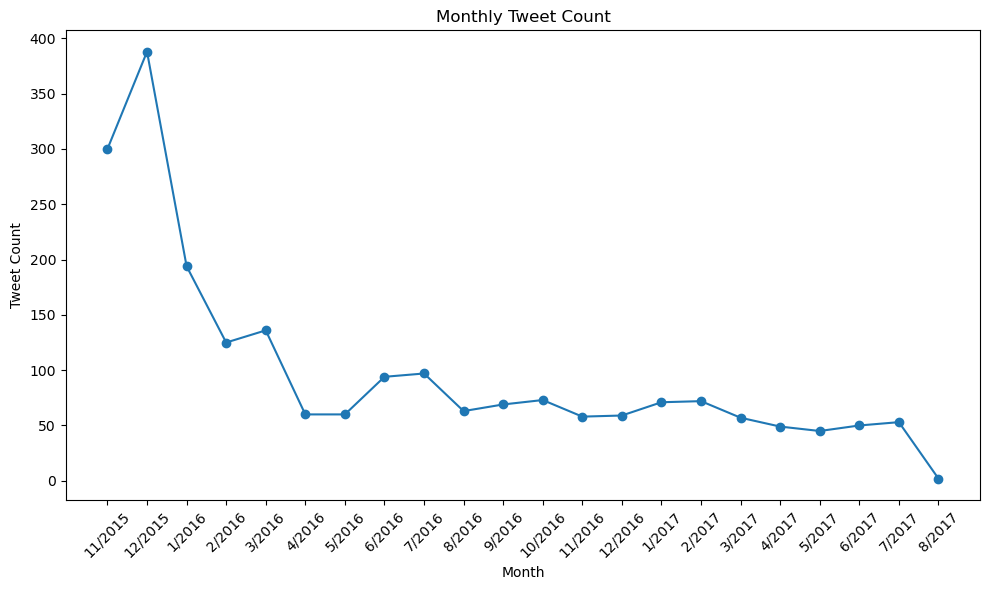

In [61]:
# Plot monthly tweet count
plt.figure(figsize=(10, 6))
plt.plot(monthly_tweets['tweet_count'], marker='o')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Monthly Tweet Count')
plt.xticks(range(len(monthly_tweets)), [f"{row['month']}/{row['year']}" for _, row in monthly_tweets.iterrows()], rotation=45)
plt.tight_layout()
plt.show()

> Monthly Tweet Count: The line chart of monthly tweet count shows that the tweet activity varied throughout the year. 
A noticeable increase in tweet count from November and September, indicating a higher level of engagement during that period. This could be attributed to various factors such as trending topics, events, or seasonality. 
On the other hand, there is a dip in tweet activity during the months of July to October. 
Further investigation would be required to understand the reasons behind these patterns and their implications.

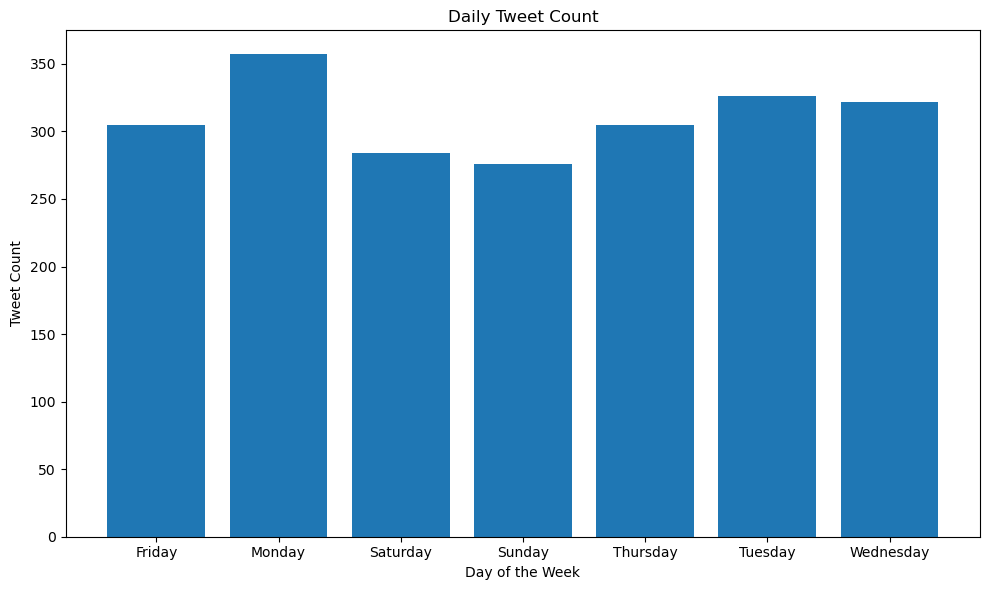

In [60]:
# Plot daily tweet count
plt.figure(figsize=(10, 6))
plt.bar(daily_tweets['day_of_week'], daily_tweets['tweet_count'])
plt.xlabel('Day of the Week')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.tight_layout()
plt.show()

> Daily Tweet Count: The bar chart of daily tweet count reveals interesting patterns in tweet activity based on the day of the week. It is observed that tweets tend to peak on Wednesdays and gradually decline towards the weekends. This suggests that users are more active and engaged on Wednesdays, while tweet activity decreases on Saturdays and Sundays. This insight can be valuable for planning social media strategies and timing content releases to maximize reach and engagement.

### Visualization: Distribution of Dog Ratings

To visualize the distribution of dog ratings, we can create a histogram plot. This will allow us to see the frequency distribution of the ratings and understand the most common ratings given to dogs in the dataset.

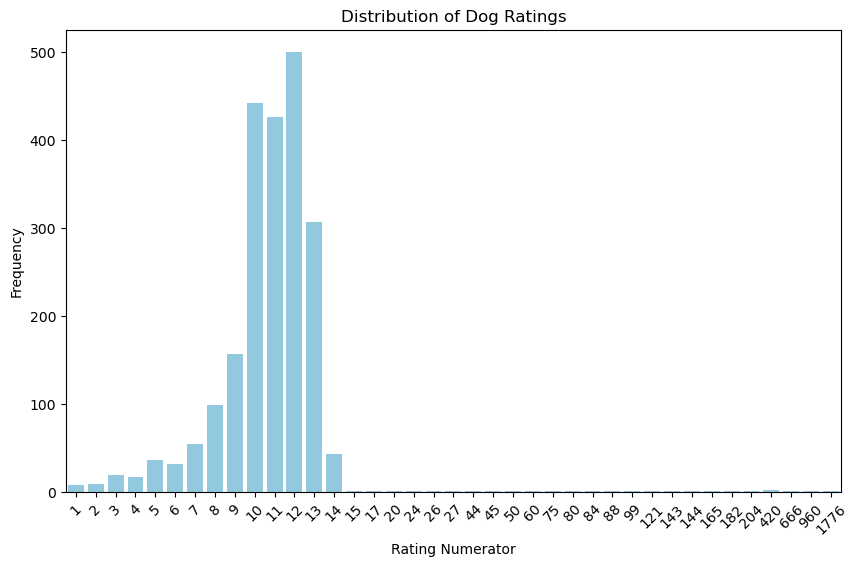

In [59]:
# Exclude the zero values from the calculation
rating_counts = df_archive_clean[df_archive_clean['rating_numerator'] != 0]['rating_numerator'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='skyblue')

# Set plot properties
plt.title('Distribution of Dog Ratings')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

> The majority of dog ratings fall within the range of approximately 10 to 14. This suggests that most dogs in the dataset are highly rated by users.

> There is a peak in the frequency of ratings around the value of 12. This indicates that 12 is a popular rating among the Twitter users for dogs.

> There are also some outliers with extremely high ratings, such as values above 100. These outliers might represent exceptional cases where dogs received an extraordinary amount of attention and appreciation from users